# Bernoulli Shift

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["figure.figsize"] = (8, 3.5)

Consider the Bernoulli shift map

$$
    x_{n+1} = 2 x_n \mod 1
$$

For $x\in(0,1]$

In [3]:
x = 3/5
2 * x % 1

0.19999999999999996

There are two ways to start a bernoulli-shift process:
1. We can work with fractions
2. We can work with "symbols"

## With fractions

In [76]:
def bernoulli_shift(x0, n_its):
    x_hist = [x0]
    x = x0
    for _ in range(n_its-1):
        x = 2 * x % 1
        x_hist.append(x)
    return x_hist

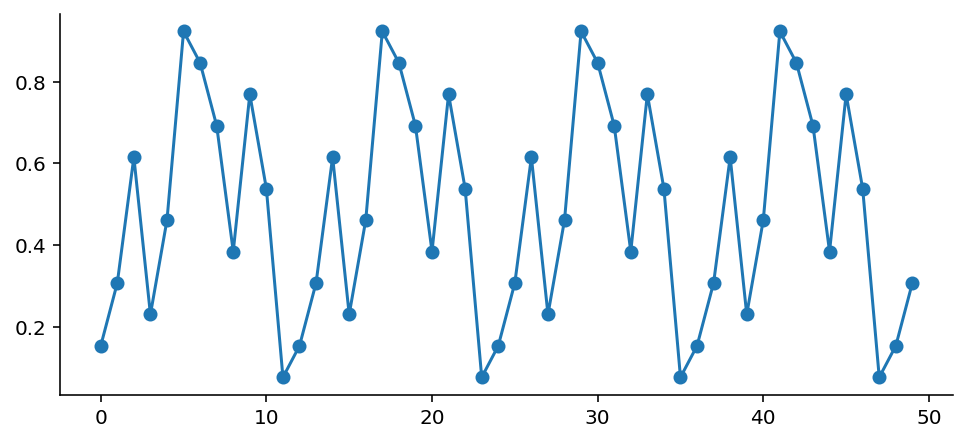

In [77]:
n_iterations = 50

x0 = Fraction(2, 13)
x_hist = bernoulli_shift(x0, n_iterations)


plt.plot(x_hist, marker="o");

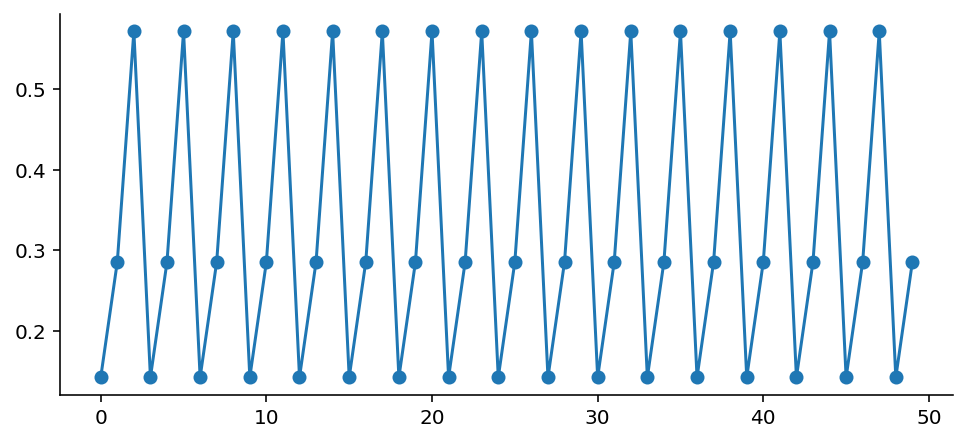

In [78]:
n_iterations = 50

x0 = Fraction(1, 7)
x_hist = bernoulli_shift(x0, n_iterations)


plt.plot(x_hist, marker="o");

## With symbols

Starting with a fraction (represented in binary form), the bernoulli shift "shifts" the decimal places to the right

$$
    \frac{1}{3} = 0 \frac{1}{2} + 1 \frac{1}{2^2} + 0 \frac{1}{2^3} + 1 \frac{1}{2^4} + \ldots
$$

In [79]:
vals = [x % 2 for x in range(60)]
nv = len(vals)

print(vals[:10])
(vals / 2 ** np.arange(1, nv+1)).sum()

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


0.3333333333333333

In [80]:
1/3

0.3333333333333333

### Shifting the value by one digit

In [81]:
# shifting values by 1
vals = vals[1:]

print(vals[:10])
(vals / 2 ** np.arange(1, nv)).sum()

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


0.6666666666666666

In [82]:
2/3

0.6666666666666666

The next iteration of the Bernoulli shift brings us back to $1/3$.

In [84]:
bernoulli_shift(Fraction(1, 3), 3)

[Fraction(1, 3), Fraction(2, 3), Fraction(1, 3)]

## Another representation

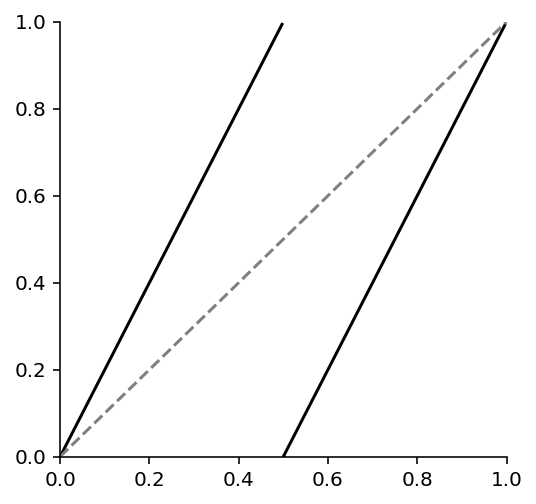

In [128]:
def f(x): return 2 * x % 1

xvals = np.linspace(0, 1, 500)
fxvals = f(xvals)

pos = np.where(np.abs(np.diff(fxvals)) >= 0.7)
fxvals[pos] = np.nan
xvals[pos] = np.nan

plt.figure(figsize=(4, 4))
plt.plot(xvals, f(xvals), c="black")
plt.plot([0, 1], [0, 1], c="tab:gray", linestyle="--")
plt.xlim(0, 1)
plt.ylim(0, 1);

In [160]:
n_iterations = 20
x0 = 1/7

x_vals, y_vals = [x0], [0.0]

x = x0
for _ in range(n_iterations):
    # y-update
    y_new = f(x)
    x_vals.append(x)
    y_vals.append(y_new)
    
    # x-update
    x = y_new
    x_vals.append(x)
    y_vals.append(x)

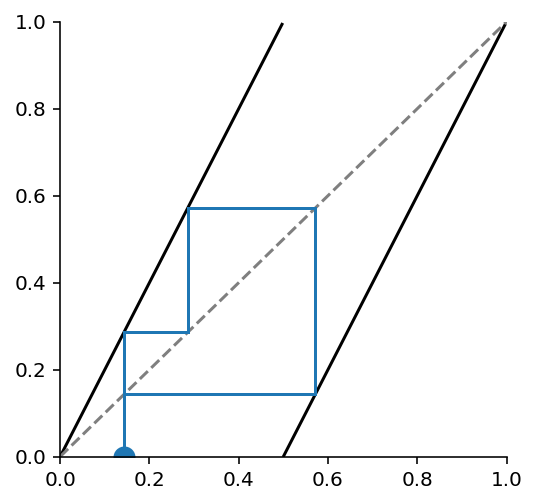

In [161]:
plt.figure(figsize=(4, 4))
plt.scatter([x0], [0], s=100)
plt.plot(xvals, f(xvals), c="black")
plt.plot([0, 1], [0, 1], c="tab:gray", linestyle="--")
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.plot(x_vals, y_vals);

In [157]:
x_vals[::2]

[0.6666666666666666,
 0.33333333333333326,
 0.6666666666666665,
 0.33333333333333304,
 0.6666666666666661,
 0.33333333333333215,
 0.6666666666666643,
 0.3333333333333286,
 0.6666666666666572,
 0.3333333333333144,
 0.6666666666666288]